In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
stops = set(stopwords.words("english"))

In [3]:
stops = stops.union({"said", "would", "could", "told", "also", "one", "two", "mr", "new", "year"})

In [4]:
df = pd.read_csv("bbc_text_cls.csv")

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
vectorizer = TfidfVectorizer(stop_words=stops)

In [7]:
X = vectorizer.fit_transform(df["text"])

In [8]:
nmf = NMF(n_components=10, beta_loss="kullback-leibler", solver="mu", random_state=0)

In [9]:
nmf.fit(X)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(beta_loss='kullback-leibler', n_components=10, random_state=0, solver='mu')

In [12]:
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words-1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle("NMF", fontsize=40)
    
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

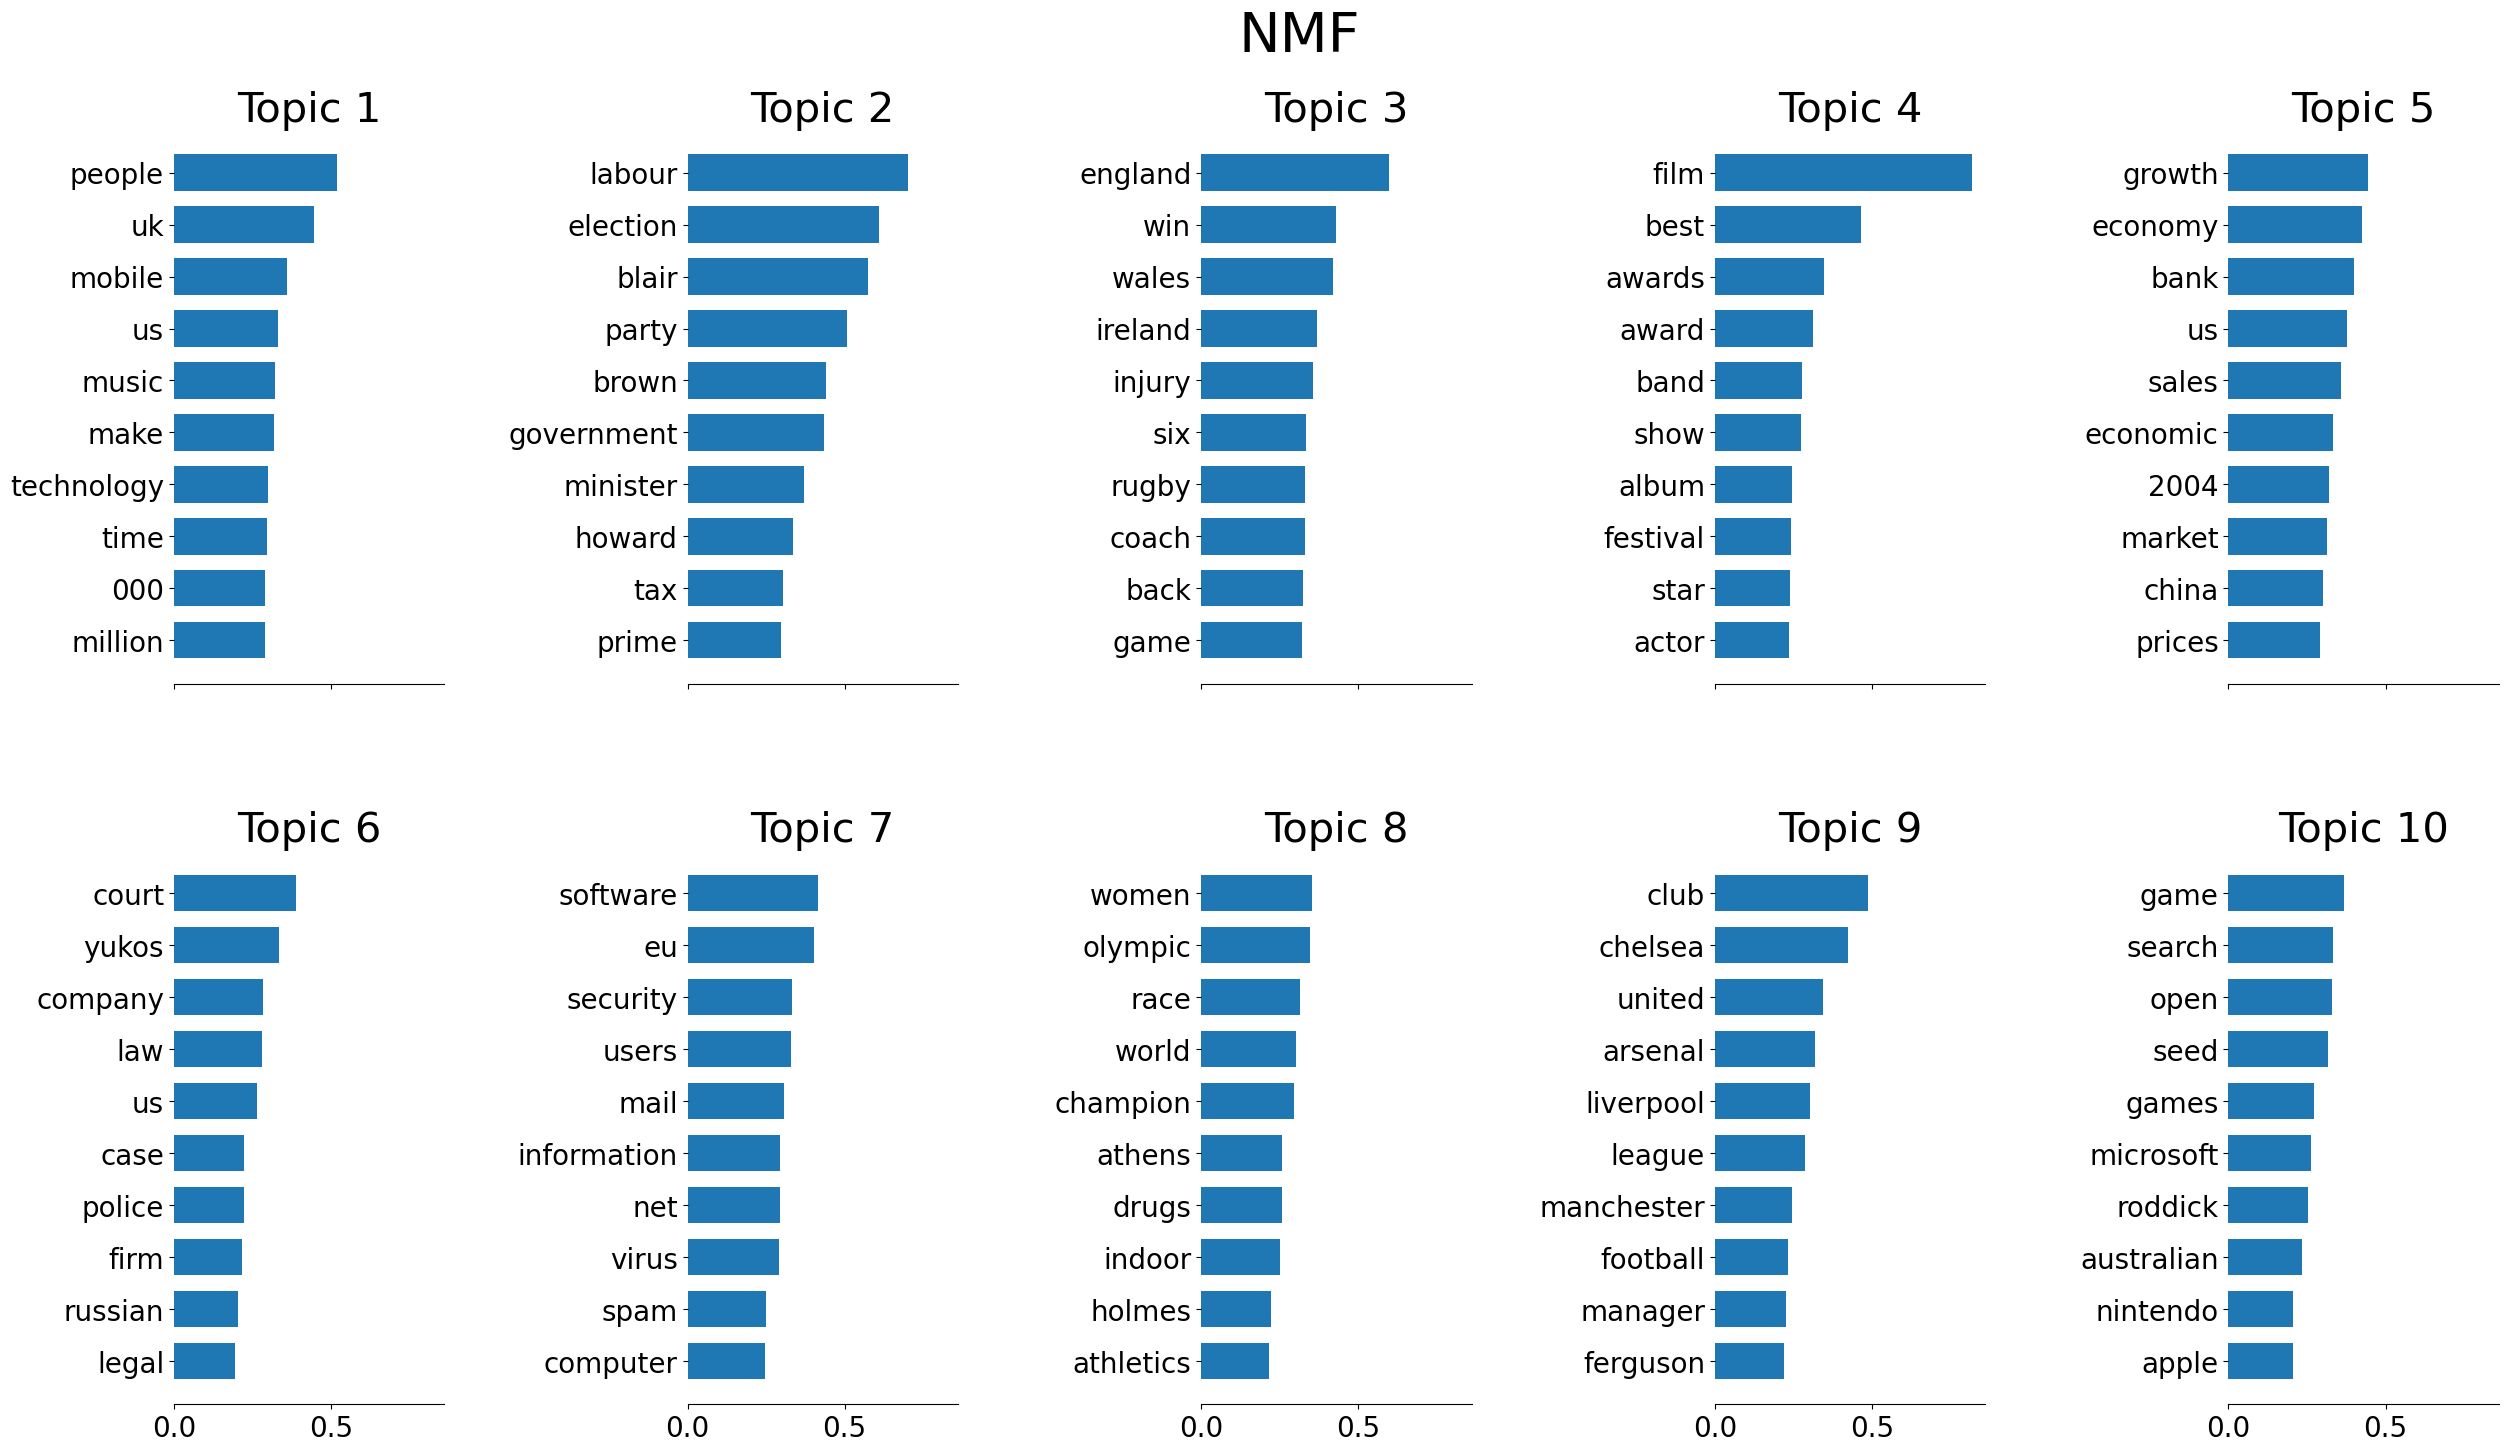

In [13]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf, feature_names)

In [14]:
Z = nmf.transform(X)

Text(0.5, 1.0, 'True label sport')

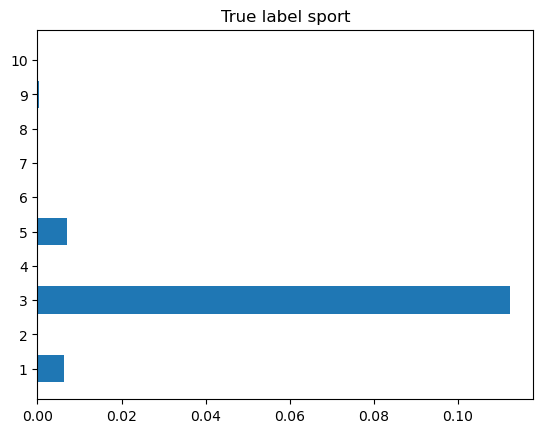

In [15]:
np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title(f"True label {df.iloc[i]['labels']}")

In [ ]:
def wrap(x):
    return textwrap.fill(x, replace_whitespace=False, )